In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#libraries for decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image   #to view the image of the tree
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
# knn 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
import pylab as plot

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression,LogisticRegression
import statsmodels.formula.api as smf
#pckage to split data into train and test
from sklearn.model_selection import train_test_split
# polynomial feature
from sklearn.preprocessing import PolynomialFeatures
# calculating confusion matricss
from sklearn import metrics
#for roc and auc curve
from sklearn.metrics import roc_curve, auc
# for cross validation
from sklearn.cross_validation import cross_val_score

C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('datafile.csv')

In [4]:
data.head()

,S. No. (Col.1),State/UT (Col.2),No. of Cases in which Arms# Seized (Col.3),Fire Arms - No. of Un-licensed/ Improvised/ Crude/ Country-made Arms (Col.4),Fire Arms - No. of Licensed/ Factory Made Arms (Col.5),Fire Arms - Total Fire Arms Seized (Col.6) = (Col.4 + Col.5),Other than Fire Arms (Col.7),Total Arms Seized (Col.8) = (Col.6+ Col.7),Ammunition Seized (Col.9)
0,1,Andhra Pradesh,41,24,5,29,7,36,3
1,2,Arunachal Pradesh,31,9,24,33,2,35,1466
2,3,Assam,324,307,55,362,2,364,4601
3,4,Bihar,1487,2214,154,2368,369,2737,8892
4,5,Chhattisgarh,700,312,12,324,415,739,170


In [5]:
data.describe()

,S. No. (Col.1),No. of Cases in which Arms# Seized (Col.3),Fire Arms - No. of Un-licensed/ Improvised/ Crude/ Country-made Arms (Col.4),Fire Arms - No. of Licensed/ Factory Made Arms (Col.5),Fire Arms - Total Fire Arms Seized (Col.6) = (Col.4 + Col.5),Other than Fire Arms (Col.7),Total Arms Seized (Col.8) = (Col.6+ Col.7),Ammunition Seized (Col.9)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.500000,1498.027778,1001.777778,29.222222,1031.000000,538.888889,1569.888889,2969.444444
std,10.535654,4732.236243,2903.329164,76.631628,2974.061331,1791.389306,4706.408390,7333.193148
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.750000,19.500000,7.000000,1.500000,16.000000,0.000000,19.000000,75.000000
50%,18.500000,120.000000,119.000000,6.500000,129.500000,5.500000,156.000000,421.000000
75%,27.250000,632.000000,517.250000,16.250000,543.000000,116.500000,696.250000,2153.250000
max,36.000000,27227.000000,16990.000000,439.000000,17429.000000,9760.000000,27189.000000,38981.000000


In [6]:
2974/129.5

22.965250965250966

In [7]:
22.965*100

2296.5

In [8]:
data.columns

Index(['S. No. (Col.1)', 'State/UT (Col.2)',
       'No. of Cases in which Arms# Seized (Col.3)',
       'Fire Arms - No. of Un-licensed/ Improvised/ Crude/ Country-made Arms (Col.4)',
       'Fire Arms - No. of Licensed/ Factory Made Arms (Col.5)',
       'Fire Arms - Total Fire Arms Seized (Col.6) = (Col.4 + Col.5)',
       'Other than Fire Arms (Col.7)',
       'Total Arms Seized (Col.8) = (Col.6+ Col.7)',
       'Ammunition Seized (Col.9)'],
      dtype='object')

In [10]:
from scipy.stats import zscore

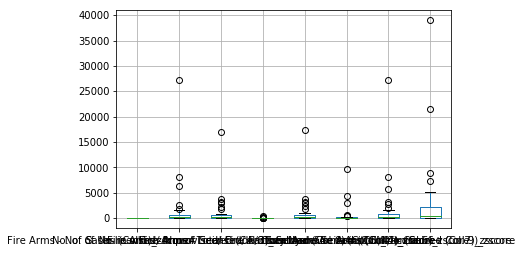

In [23]:
data.boxplot()

In [25]:
data.columns = ['S. No','State/UT','No. of Cases in which Arms# Seized',
                'Fire Arms - No. of Un-licensed/ Improvised/ Crude/ Country-made Arms',
                'Fire Arms - No. of Licensed/ Factory Made Arms','Fire Arms - Total Fire Arms Seized',
               'Other than Fire Arms','Total Arms Seized','Ammunition Seized']

In [26]:
data.head()

,S. No,State/UT,No. of Cases in which Arms# Seized,Fire Arms - No. of Un-licensed/ Improvised/ Crude/ Country-made Arms,Fire Arms - No. of Licensed/ Factory Made Arms,Fire Arms - Total Fire Arms Seized,Other than Fire Arms,Total Arms Seized,Ammunition Seized
0,1,Andhra Pradesh,41,24,5,29,7,36,3
1,2,Arunachal Pradesh,31,9,24,33,2,35,1466
2,3,Assam,324,307,55,362,2,364,4601
3,4,Bihar,1487,2214,154,2368,369,2737,8892
4,5,Chhattisgarh,700,312,12,324,415,739,170


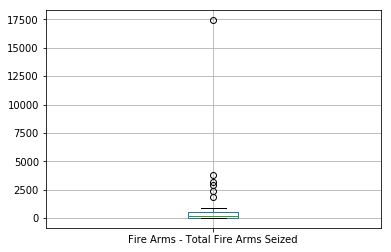

In [27]:
data.boxplot(column='Fire Arms - Total Fire Arms Seized')

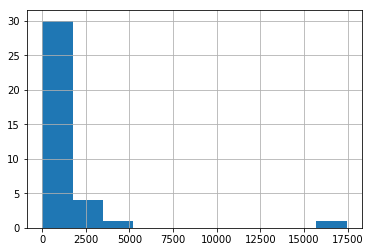

In [28]:
data['Fire Arms - Total Fire Arms Seized'].hist()

In [29]:
data = pd.read_csv('mtcars.csv')

In [30]:
data.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [32]:
data.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

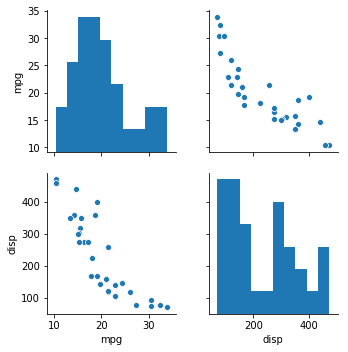

In [34]:
sns.pairplot(data[['mpg','disp']])

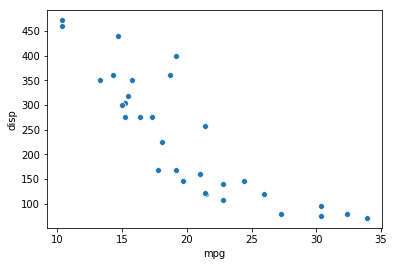

In [36]:
sns.scatterplot(x=data['mpg'],y=data['disp'])

In [37]:
from scipy.stats import linregress
linregress(data['mpg'],data['disp'])

LinregressResult(slope=-17.42912167035629, intercept=580.883822558502, rvalue=-0.8475513792624788, pvalue=9.380326537381263e-10, stderr=1.992548271562749)